# Analyza dat

Toto je jednoducha ukazka toho, jak analyzovat data, ktera jsme ziskali z nasi virtualni skoly.

## Jak To Funguje

Budeme pouzivat Python (https://python.cz/), coz je velmi popularni programovaci jazyk. Existuje k nemu velke mnozstvi knihoven, takze i velmi slozite veci se daji udelat na par radcich.

Kdyz zmacknes Shift + Enter, tak se provedou vsechny prikazy, ktere jsou v dane bunce. Kdyz bezi vypocet, tak je u bunky misto cisla *. Muzes si to vyzkouset na nasledujici bunce.

In [109]:
# zkus zmacknout Shift + Enter, pripadne kliknout na Run v menu nahore.
import time
time.sleep(3)

print("Faktorial")
def faktorial(n):
    if n <= 0:
        return 1
    else:
        return n * faktorial(n - 1)
    
for i in range(10):
    print("%3d! = %10d" % (i, faktorial(i)))
    time.sleep(0.3)
    
# hash na zacatku radku je komentar
# zakomentovane prikazy se neprovadi
# zkus zakomentovat vsechny radky s prikazem sleep

# nemusis kod smazat, staci ho zakomentovat :)

Faktorial
  0! =          1
  1! =          1
  2! =          2
  3! =          6
  4! =         24
  5! =        120
  6! =        720
  7! =       5040
  8! =      40320
  9! =     362880


In [110]:
3 + 2

5

In [111]:
5 ** 2

25

Ted uz rozumis Pythonu a dokazes spoustet prikazy, takze se muzeme pustit do skutecne prace.

Data, ktera budeme pouzivat v tomto prikladu pochazi ze simulace. Pokud si chces prohlednout, muzes se podivat na jeji zdrojovy kod - https://github.com/martin-majlis/ms-opendata-simulation

Tato simulace je velmi jednoducha. Na skolu sviti slunce, fouka vitra a okolo jezdi auta. Do skoly chodi take studenti, kteri maji pravidelny rozvrh. Studenti se podle rozvrhu presouvaji mezi jednotlivymi ucebnami.

Kazdy student produkuje teplo a hluk. Ve skole neni zadne topeni ani klimatizace.

In [119]:
# stahni si nasimulovana data
! curl 'https://raw.githubusercontent.com/martin-majlis/ms-opendata-simulation/master/preprocessed/with-derived.csv?v=1' > sim-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3219k  100 3219k    0     0  1427k      0  0:00:02  0:00:02 --:--:-- 1428k


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Nacteme data
data = pd.read_csv('sim-data.csv')

# Nastavime nektere sloupecky jako kategoricke
data["D_DayOfWeek"] = data["D_DayOfWeek"].astype("category")
data["D_HourOfDay"] = data["D_HourOfDay"].astype("category")
data["D_DayHour"] = data["D_DayHour"].astype("category")

# dataS obsahuje pouze data, kdy jsou ve tride nejaci studenti
data_active = data[data['D_TOTAL-Count'] > 0]

In [122]:
# Muzeme se podivat na nazvy jednotlivych sloupcu
list(data.columns)

['TS',
 'Count-CC-Count',
 'Count-JJ-Count',
 'Count-JV-Count',
 'Count-JZ-Count',
 'Count-SS-Count',
 'Count-SV-Count',
 'Count-SZ-Count',
 'Count-VV-Count',
 'Count-ZZ-Count',
 'D-Count-CC-Count-1',
 'D-Count-CC-Count-3',
 'D-Count-CC-Count-6',
 'D-Count-JJ-Count-1',
 'D-Count-JJ-Count-3',
 'D-Count-JJ-Count-6',
 'D-Count-JV-Count-1',
 'D-Count-JV-Count-3',
 'D-Count-JV-Count-6',
 'D-Count-JZ-Count-1',
 'D-Count-JZ-Count-3',
 'D-Count-JZ-Count-6',
 'D-Count-SS-Count-1',
 'D-Count-SS-Count-3',
 'D-Count-SS-Count-6',
 'D-Count-SV-Count-1',
 'D-Count-SV-Count-3',
 'D-Count-SV-Count-6',
 'D-Count-SZ-Count-1',
 'D-Count-SZ-Count-3',
 'D-Count-SZ-Count-6',
 'D-Count-VV-Count-1',
 'D-Count-VV-Count-3',
 'D-Count-VV-Count-6',
 'D-Count-ZZ-Count-1',
 'D-Count-ZZ-Count-3',
 'D-Count-ZZ-Count-6',
 'D-D_TOTAL-Count-1',
 'D-D_TOTAL-Count-3',
 'D-D_TOTAL-Count-6',
 'D-Noise-CC-Noise-1',
 'D-Noise-CC-Noise-3',
 'D-Noise-CC-Noise-6',
 'D-Noise-JJ-Noise-1',
 'D-Noise-JJ-Noise-3',
 'D-Noise-JJ-Noise-6

In [123]:
# Muzeme se podivat na vlastnosti jednotlivych sloupcu
data.describe()

,Count-CC-Count,Count-JJ-Count,Count-JV-Count,Count-JZ-Count,Count-SS-Count,Count-SV-Count,Count-SZ-Count,Count-VV-Count,Count-ZZ-Count,D-Count-CC-Count-1,...,Temp-JJ-Temperature,Temp-JV-Temperature,Temp-JZ-Temperature,Temp-SS-Temperature,Temp-SV-Temperature,Temp-SZ-Temperature,Temp-VV-Temperature,Temp-ZZ-Temperature,Wind-Direction,Wind-Speed
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1679.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,9.803571,8.196429,7.577381,7.636905,5.958333,7.529762,7.690476,7.690476,6.119048,0.000000,...,3.632133,3.533695,3.526980,-0.542742,-0.243276,-0.216957,1.437715,1.144491,118.723892,112.266088
std,18.535499,16.713705,15.262834,15.835074,12.825560,15.390461,15.789319,15.646083,13.615502,15.776297,...,12.678125,12.614113,12.627883,10.665874,10.824750,10.842581,11.434221,11.254260,54.022529,69.691718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-65.000000,...,-17.768372,-17.768372,-17.768372,-17.768372,-17.768372,-17.768372,-17.768372,-17.768372,5.251281,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.679878,-7.674642,-7.643033,-8.723268,-8.634994,-8.606604,-7.889809,-7.874446,75.125761,59.720618
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.535001,2.532029,2.072640,-4.470848,-4.138733,-3.826248,-1.496171,-1.834379,115.400634,84.699651
75%,13.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.957219,11.816275,11.937948,6.392544,6.683118,6.973309,8.977202,8.802025,166.900935,176.357134
max,69.000000,63.000000,67.000000,71.000000,57.000000,69.000000,63.000000,63.000000,65.000000,58.000000,...,46.980239,46.006472,44.669809,36.156714,35.163547,36.380299,35.530655,38.527455,236.921672,264.360174


In [124]:
# A ted na vlastnosti dat, kdyz se ve skole vyucuje
# Ktere hodnoty se zmenily a proc?
data_active.describe()

,Count-CC-Count,Count-JJ-Count,Count-JV-Count,Count-JZ-Count,Count-SS-Count,Count-SV-Count,Count-SZ-Count,Count-VV-Count,Count-ZZ-Count,D-Count-CC-Count-1,...,Temp-JJ-Temperature,Temp-JV-Temperature,Temp-JZ-Temperature,Temp-SS-Temperature,Temp-SV-Temperature,Temp-SZ-Temperature,Temp-VV-Temperature,Temp-ZZ-Temperature,Wind-Direction,Wind-Speed
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,29.945455,25.036364,23.145455,23.327273,18.200000,23.000000,23.490909,23.490909,18.690909,0.927273,...,12.448513,12.147828,12.127320,2.968896,3.883628,3.964020,7.563746,6.668080,116.571030,111.927129
std,21.129679,20.783351,18.747112,20.004603,16.729281,19.181807,19.763513,19.412006,18.208340,27.043684,...,11.640361,11.653204,11.713834,11.031598,11.186522,11.209405,11.299175,11.208808,54.817523,72.596040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-65.000000,...,-12.475447,-12.475447,-12.475447,-17.448933,-13.912092,-14.571053,-12.475447,-10.526570,8.567312,4.348525
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,...,4.280583,4.355896,3.759440,-5.291005,-5.067204,-4.433676,-1.003397,-1.853529,70.126952,58.572156
50%,24.000000,22.000000,19.000000,19.000000,17.000000,17.000000,19.000000,20.000000,17.000000,3.000000,...,9.792402,9.271500,9.515654,-0.499189,0.982848,0.670532,4.883315,3.649194,105.369666,80.538516
75%,53.000000,44.000000,36.000000,41.000000,29.000000,37.000000,36.000000,40.000000,34.000000,17.000000,...,19.280210,19.592863,19.698572,10.359142,11.840416,10.702010,14.721673,12.921847,164.401434,176.074191
max,69.000000,63.000000,67.000000,71.000000,57.000000,69.000000,63.000000,63.000000,65.000000,58.000000,...,46.980239,46.006472,44.669809,36.156714,35.163547,36.380299,35.530655,38.527455,231.102023,264.360174


In [125]:
# nebo jednotlive - hluk v severo vychodni mistnosti
data['Noise-SV-Noise'].describe()

count    1680.000000
mean       43.625388
std        13.043842
min        30.000000
25%        33.849948
50%        39.668750
75%        49.714716
max        96.704180
Name: Noise-SV-Noise, dtype: float64

In [126]:
# teplota v jiho-zapadni mistnosti
data['Temp-JZ-Temperature'].describe()

count    1680.000000
mean        3.526980
std        12.627883
min       -17.768372
25%        -7.643033
50%         2.072640
75%        11.937948
max        44.669809
Name: Temp-JZ-Temperature, dtype: float64

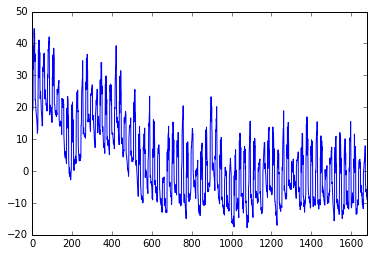

In [127]:
data['Temp-JZ-Temperature'].plot()
plt.show()

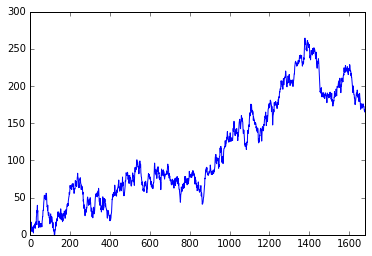

In [128]:
data['Wind-Speed'].plot()
plt.show()

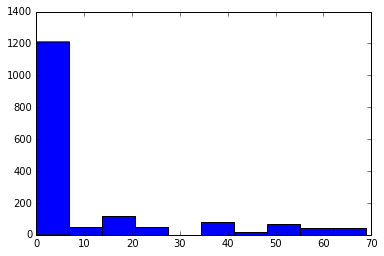

In [129]:
# Muzeme se podivat na histogram poctu studentu ve tride center-center
plt.hist(data["Count-CC-Count"])
plt.show()

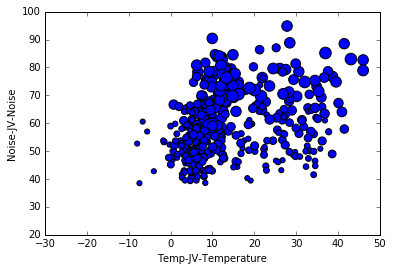

In [130]:
data.plot.scatter(x='Temp-JV-Temperature', y='Noise-JV-Noise', s=data['Count-JV-Count'] * 2)
plt.show()

## Korelace

Ted se podivame, jak mezi sebou jednotlive hodnoty koreluji - https://cs.wikipedia.org/wiki/Korelace

Hodnota korelačního koeficientu −1 značí zcela nepřímou závislost (antikorelaci), tedy čím více se zvětší hodnoty v první skupině znaků, tím více se zmenší hodnoty v druhé skupině znaků, např. vztah mezi uplynulým a zbývajícím časem. Hodnota korelačního koeficientu +1 značí zcela přímou závislost, např. vztah mezi rychlostí bicyklu a frekvencí otáček kola bicyklu. Pokud je korelační koeficient roven 0 (nekorelovanost), pak mezi znaky není žádná statisticky zjistitelná lineární závislost. Je dobré si uvědomit, že i při nulovém korelačním koeficientu na sobě veličiny mohou záviset, pouze tento vztah nelze vyjádřit lineární funkcí, a to ani přibližně.

In [131]:
# Ted se podivame, ktere sloupecky koreluji s hlukem v mistnosti jiho-vychod?
# Nejaky napad, proc tomu tak je?
data.corr()["Noise-JV-Noise"].sort_values()

D-Count-SZ-Count-1         -0.120138
INDEX                      -0.076240
D-Count-JJ-Count-1         -0.060293
D-Count-CC-Count-1         -0.057627
D-Count-SV-Count-1         -0.057491
Wind-Direction             -0.052145
D-Temp-SZ-Temperature-1    -0.041599
Wind-Speed                 -0.028665
D-Count-SZ-Count-3         -0.024359
D-Count-JZ-Count-1         -0.011781
D-Noise-SZ-Noise-1         -0.007102
D-Wind-Speed-1             -0.003516
D-Wind-Speed-6              0.010387
D-Wind-Speed-3              0.011113
D-Temp-JJ-Temperature-1     0.012427
D-Temp-CC-Temperature-1     0.013650
D-Noise-JJ-Noise-1          0.021852
D-Temp-SV-Temperature-1     0.024764
D-Wind-Direction-1          0.029354
D-Noise-CC-Noise-1          0.031135
D-Wind-Direction-3          0.032874
D-Noise-SV-Noise-1          0.036491
D-Temp-JZ-Temperature-1     0.040615
D-Wind-Direction-6          0.051318
D-OutTempJ-Temperature-1    0.052848
D-Count-JJ-Count-3          0.053033
D-Count-SS-Count-1          0.053838
O

In [133]:
# Ted se podivame, jak vypada korelace, kdyz tam byli studenti
# Proc se to tak zmenilo?
data_active.corr()["Noise-JV-Noise"].sort_values()

D-Count-SZ-Count-1         -0.204364
D-Temp-SZ-Temperature-1    -0.174610
D-Noise-SZ-Noise-1         -0.151339
D-Count-JJ-Count-1         -0.125495
D-Count-SV-Count-1         -0.120992
D-Count-CC-Count-1         -0.118166
D-Count-SZ-Count-3         -0.112609
Count-SZ-Count             -0.108380
D-Noise-JJ-Noise-1         -0.086941
D-Temp-SV-Temperature-1    -0.085403
D-Temp-CC-Temperature-1    -0.075777
D-Noise-SV-Noise-1         -0.072396
D-Noise-CC-Noise-1         -0.072119
D-Temp-JJ-Temperature-1    -0.061421
INDEX                      -0.059137
D-Temp-SZ-Temperature-3    -0.048753
D-Count-JZ-Count-1         -0.037857
D-Wind-Speed-6             -0.036090
Wind-Speed                 -0.023369
Wind-Direction             -0.022532
Count-SV-Count             -0.022024
D-Temp-JZ-Temperature-1    -0.006413
D-Count-SZ-Count-6         -0.004552
D-Wind-Speed-1              0.001824
D-Wind-Speed-3              0.002052
D-Wind-Direction-6          0.011854
D-Count-JJ-Count-3          0.012212
D

In [134]:
from sklearn.model_selection import train_test_split
# Generate the training set.  Set random_state to be able to replicate results.
train = data_active.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = data_active.loc[~data_active.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(440, 138)
(110, 138)


In [135]:
# Get all the columns from the dataframe.
columns = data_active.columns.tolist()
# Filter the columns to remove ones we don't want.
# columns = [c for c in columns if c not in ["Count-SV-Count", "INDEX", "TS", "TS.1", "D_DayOfWeek", "D_HourOfDay"]]

columns = [
    "Noise-VV-Noise", 
    "Noise-SV-Noise", 
    "Temp-SV-Temperature", 
    "Temp-VV-Temperature", 
    "Wind-Direction", 
    "Wind-Speed",
    #"OutTempJ-Temperature",
    #"OutTempS-Temperature"
]
# Store the variable we'll be predicting on.
target = "Count-SV-Count"

In [136]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

103.91026798106584

In [147]:
from sklearn import datasets, svm, metrics
columns = [
    "Noise-SZ-Noise",
    "Noise-SS-Noise",
    "Noise-SV-Noise",
    "Noise-ZZ-Noise",
    "Noise-CC-Noise",
    "Noise-VV-Noise",
    "Noise-JZ-Noise",
    "Noise-JJ-Noise",
    "Noise-JV-Noise",
    
    "D-Noise-SZ-Noise-1",
    "D-Noise-SS-Noise-1",
    "D-Noise-SV-Noise-1",
    "D-Noise-ZZ-Noise-1",
    "D-Noise-CC-Noise-1",
    "D-Noise-VV-Noise-1",
    "D-Noise-JZ-Noise-1",
    "D-Noise-JJ-Noise-1",
    "D-Noise-JV-Noise-1",    
    
    "D-Noise-SZ-Noise-3",
    "D-Noise-SS-Noise-3",
    "D-Noise-SV-Noise-3",
    "D-Noise-ZZ-Noise-3",
    "D-Noise-CC-Noise-3",
    "D-Noise-VV-Noise-3",
    "D-Noise-JZ-Noise-3",
    "D-Noise-JJ-Noise-3",
    "D-Noise-JV-Noise-3",     
    
    "Temp-SZ-Temperature",
    "Temp-SS-Temperature",
    "Temp-SV-Temperature",
    "Temp-ZZ-Temperature",
    "Temp-CC-Temperature",
    "Temp-VV-Temperature",
    "Temp-JZ-Temperature",
    "Temp-JJ-Temperature",
    "Temp-JV-Temperature",   
    
    "OutNoiseZ-Noise",
    "Wind-Direction", 
    "Wind-Speed",
    "OutTempJ-Temperature",
    "OutTempS-Temperature"
]
#target = "D_DayHour"
#target = "D_DayOfWeek"
target = "D_HourOfDay"

classifier = svm.SVC(gamma=0.001)
classifier.fit(train[columns], train[target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
# Now predict the value of the digit on the second half:
expected = test[target]
predicted = classifier.predict(test[columns])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        10h       1.00      0.40      0.57        10
        11h       1.00      0.55      0.71        11
        12h       1.00      0.42      0.59        12
        13h       1.00      0.33      0.50         9
        14h       1.00      0.33      0.50        12
        15h       1.00      0.60      0.75        10
        16h       0.80      0.89      0.84         9
         6h       1.00      0.50      0.67        10
         7h       0.11      1.00      0.21         7
         8h       1.00      0.08      0.15        12
         9h       1.00      0.62      0.77         8

avg / total       0.93      0.49      0.57       110


Confusion matrix:
[[ 4  0  0  0  0  0  0  0  